Netflix Data Analysis

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('Netflix dataset.csv')

In [48]:
print(df.shape)

(100, 13)


In [49]:
print(df.head)

<bound method NDFrame.head of     index show_id     type                                              title  \
0       1      s1    Movie                               Dick Johnson Is Dead   
1       2      s2  TV Show                                      Blood & Water   
2       3      s3  TV Show                                          Ganglands   
3       4      s4  TV Show                              Jailbirds New Orleans   
4       5      s5  TV Show                                       Kota Factory   
..    ...     ...      ...                                                ...   
95     96     s96  TV Show                                         The Circle   
96     97     s97    Movie  If I Leave Here Tomorrow: A Film About Lynyrd ...   
97     98     s98  TV Show                                         Kid Cosmic   
98     99     s99  TV Show                          Octonauts: Above & Beyond   
99    100    s100  TV Show                                       On the Verge  

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         100 non-null    int64 
 1   show_id       100 non-null    object
 2   type          100 non-null    object
 3   title         100 non-null    object
 4   director      62 non-null     object
 5   cast          89 non-null     object
 6   country       60 non-null     object
 7   date_added    100 non-null    object
 8   release_year  100 non-null    int64 
 9   rating        100 non-null    object
 10  duration      100 non-null    object
 11  listed_in     100 non-null    object
 12  description   100 non-null    object
dtypes: int64(2), object(11)
memory usage: 10.3+ KB


In [51]:
df.describe()

,index,release_year
count,100.000000,100.000000
mean,50.500000,2015.110000
std,29.011492,10.167183
min,1.000000,1975.000000
25%,25.750000,2013.000000
50%,50.500000,2021.000000
75%,75.250000,2021.000000
max,100.000000,2021.000000


In [52]:
df.isnull()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,True,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,True,False,False,False,False,False,False,False,False
98,False,False,False,False,True,False,False,False,False,False,False,False,False


In [53]:
#handling missing values
df.isnull().sum()

index            0
show_id          0
type             0
title            0
director        38
cast            11
country         40
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [54]:
df['director'].fillna('Not Available')

0     Kirsten Johnson
1       Not Available
2     Julien Leclercq
3       Not Available
4       Not Available
           ...       
95      Not Available
96      Stephen Kijak
97      Not Available
98      Not Available
99      Not Available
Name: director, Length: 100, dtype: object

In [55]:
df['cast'].fillna('Not Available')

0                                         Not Available
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                         Not Available
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                            ...                        
95                                      Michelle Buteau
96    Ronnie Van Zandt, Gary Rossington, Allen Colli...
97    Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...
98    Antonio Aakeel, Chipo Chung, Simon Foster, Ter...
99    Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...
Name: cast, Length: 100, dtype: object

In [56]:
df['country'].fillna('Not Available')

0                     United States
1                      South Africa
2                     Not Available
3                     Not Available
4                             India
                  ...              
95    United States, United Kingdom
96                    United States
97                    United States
98                   United Kingdom
99            France, United States
Name: country, Length: 100, dtype: object

In [57]:
rating_map = {
    'PG': 4,
    'PG-13': 4,
    'TV-MA': 7,
    'TV-PG': 6,
    'TV-Y': 6,
    'R': 6,
    'TV-G': 7,
    'TV-14': 5,
    'TV-Y7': 6
}

df['rating_num'] = df['rating'].map(rating_map)

In [58]:
df_filtered = df[df['rating_num'] >= 5]

#Group by genre and calculate the average rating
df_grouped = df.groupby('type')['rating_num'].mean().reset_index()

#Sort movies by rating in descending order
df_sorted = df.sort_values('rating_num', ascending=False)

print(df_filtered)
print(df_grouped)
print(df_sorted)

    index show_id     type                                              title  \
1       2      s2  TV Show                                      Blood & Water   
2       3      s3  TV Show                                          Ganglands   
3       4      s4  TV Show                              Jailbirds New Orleans   
4       5      s5  TV Show                                       Kota Factory   
5       6      s6  TV Show                                      Midnight Mass   
..    ...     ...      ...                                                ...   
95     96     s96  TV Show                                         The Circle   
96     97     s97    Movie  If I Leave Here Tomorrow: A Film About Lynyrd ...   
97     98     s98  TV Show                                         Kid Cosmic   
98     99     s99  TV Show                          Octonauts: Above & Beyond   
99    100    s100  TV Show                                       On the Verge   

           director        

In [59]:
df['rating'].value_counts()

rating
TV-MA    33
TV-PG    17
TV-14    17
TV-Y7     9
PG-13     8
PG        6
TV-Y      5
R         3
TV-G      2
Name: count, dtype: int64

In [60]:
df_grouped = df.groupby('rating').size().reset_index(name='count')
print(df_grouped)

  rating  count
0     PG      6
1  PG-13      8
2      R      3
3  TV-14     17
4   TV-G      2
5  TV-MA     33
6  TV-PG     17
7   TV-Y      5
8  TV-Y7      9


In [61]:
df_filtered = df[df['rating'] == 'PG-13']
print(df_filtered)

    index show_id   type                                     title  \
0       1      s1  Movie                      Dick Johnson Is Dead   
9      10     s10  Movie                              The Starling   
27     28     s28  Movie                                 Grown Ups   
28     29     s29  Movie                                Dark Skies   
29     30     s30  Movie                                  Paranoia   
38     39     s39  Movie                       Birth of the Dragon   
44     45     s45  Movie                         Jaws: The Revenge   
88     89     s89  Movie  Blood Brothers: Malcolm X & Muhammad Ali   

           director                                               cast  \
0   Kirsten Johnson                                                NaN   
9    Theodore Melfi  Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
27     Dennis Dugan  Adam Sandler, Kevin James, Chris Rock, David S...   
28    Scott Stewart  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...   

In [62]:
df_sortted = df.sort_values('rating', ascending=False)
print(df_sorted)

    index show_id     type                                     title  \
10     11     s11  TV Show       Vendetta: Truth, Lies and The Mafia   
99    100    s100  TV Show                              On the Verge   
7       8      s8    Movie                                   Sankofa   
1       2      s2  TV Show                             Blood & Water   
66     67     s67  TV Show             Raja Rasoi Aur Anya Kahaniyan   
..    ...     ...      ...                                       ...   
42     43     s43    Movie                                    Jaws 2   
29     30     s30    Movie                                  Paranoia   
28     29     s29    Movie                                Dark Skies   
88     89     s89    Movie  Blood Brothers: Malcolm X & Muhammad Ali   
0       1      s1    Movie                      Dick Johnson Is Dead   

           director                                               cast  \
10              NaN                                          

In [63]:
df['sort_order'] = df['type'].apply(lambda x: 0 if x == 'Movie' else 1)


df['duration_value'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]))


df = df.sort_values(by=['sort_order', 'duration_value'])


df = df.drop(columns=['sort_order', 'duration_value'])

In [64]:
df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_num
71,72,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,6
45,46,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,4
77,78,s78,Movie,Little Singham - Black Shadow,Prakash Satam,"Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaush...",NaN,"September 11, 2021",2021,TV-Y7,48 min,"Children & Family Movies, Comedies",Kid cop Little Singham loses all his superpowe...,6
23,24,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,6
16,17,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,7


In [65]:
summary_stats = df[['release_year']].describe()

print(summary_stats)

       release_year
count    100.000000
mean    2015.110000
std       10.167183
min     1975.000000
25%     2013.000000
50%     2021.000000
75%     2021.000000
max     2021.000000


In [66]:
type_counts = df['type'].value_counts()

print(type_counts)

type
Movie      56
TV Show    44
Name: count, dtype: int64


In [67]:
summary_stats = df.groupby('type')['release_year'].describe()

print(summary_stats)

         count         mean        std     min      25%     50%     75%  \
type                                                                      
Movie     56.0  2011.750000  12.017033  1975.0  2004.75  2018.0  2021.0   
TV Show   44.0  2019.386364   4.457635  1994.0  2020.00  2021.0  2021.0   

            max  
type             
Movie    2021.0  
TV Show  2021.0  


In [68]:
df.iloc[:, 0].value_counts()

index
68    1
72    1
46    1
78    1
75    1
     ..
87    1
54    1
1     1
95    1
7     1
Name: count, Length: 100, dtype: int64

In [69]:
df.columns = ['index', 'show_id','type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating',
              'duration', 'listed_in', 'description', 'rating_num']

In [70]:
df['country'].value_counts()

country
United States                                                            17
Japan                                                                    13
India                                                                     6
United Kingdom                                                            5
Nigeria                                                                   3
Spain, United States                                                      1
France                                                                    1
United Kingdom, United States                                             1
China, Canada, United States                                              1
United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia     1
South Africa, United States, Japan                                        1
Germany, Czech Republic                                                   1
United States, India, France                                              1
Finl

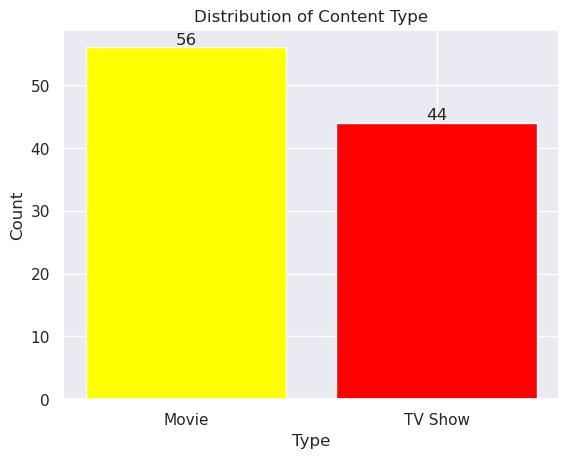

In [71]:
counts = df['type'].value_counts()


plt.bar(counts.index, counts.values, color=['yellow' if x == 'Movie' else 'red' for x in counts.index])


for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')


plt.show()

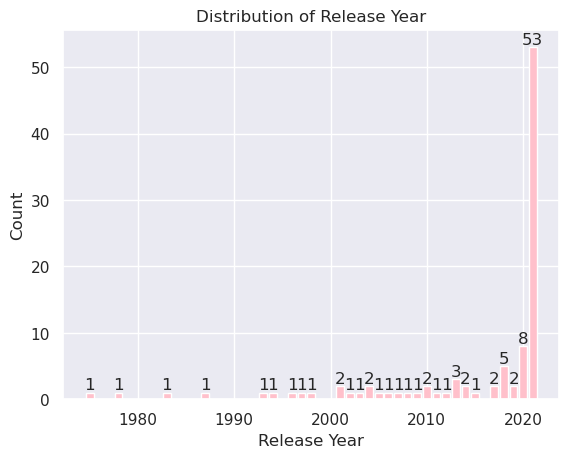

In [72]:
counts = df['release_year'].value_counts().sort_index()


plt.bar(counts.index, counts.values, color= 'pink')


for i, count in enumerate(counts.values):
    plt.text(counts.index[i], count, str(count), ha='center', va='bottom')


plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')


plt.show()

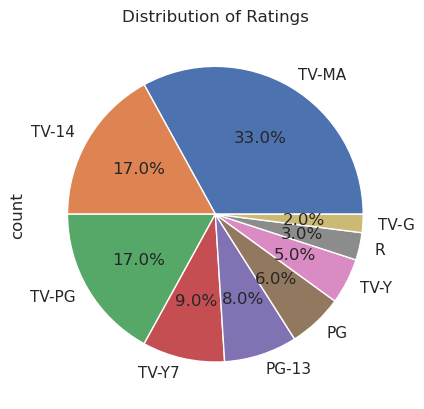

In [73]:
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

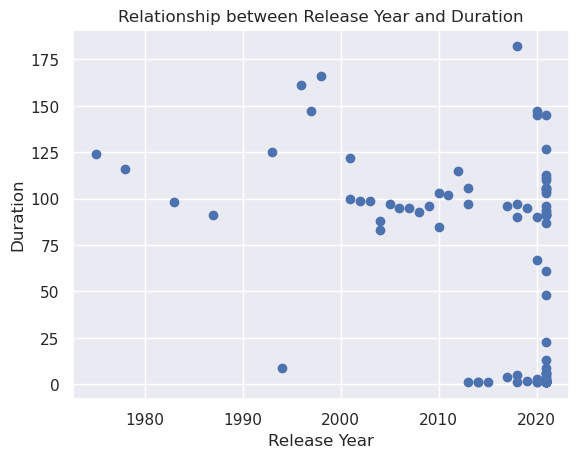

In [74]:
plt.scatter(df['release_year'], df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0])))
plt.title('Relationship between Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.show()

In [75]:
df['listed_in'].value_counts()

listed_in
Action & Adventure, Anime Features, International Movies    12
Children & Family Movies                                     6
Kids' TV                                                     4
Reality TV                                                   4
Children & Family Movies, Comedies                           3
                                                            ..
British TV Shows, International TV Shows, TV Comedies        1
International TV Shows, TV Action & Adventure, TV Dramas     1
British TV Shows, Docuseries, International TV Shows         1
Crime TV Shows, TV Comedies, TV Dramas                       1
British TV Shows, Reality TV                                 1
Name: count, Length: 61, dtype: int64

In [76]:
director_rating_crosstab = pd.crosstab(df['director'], df['rating'])

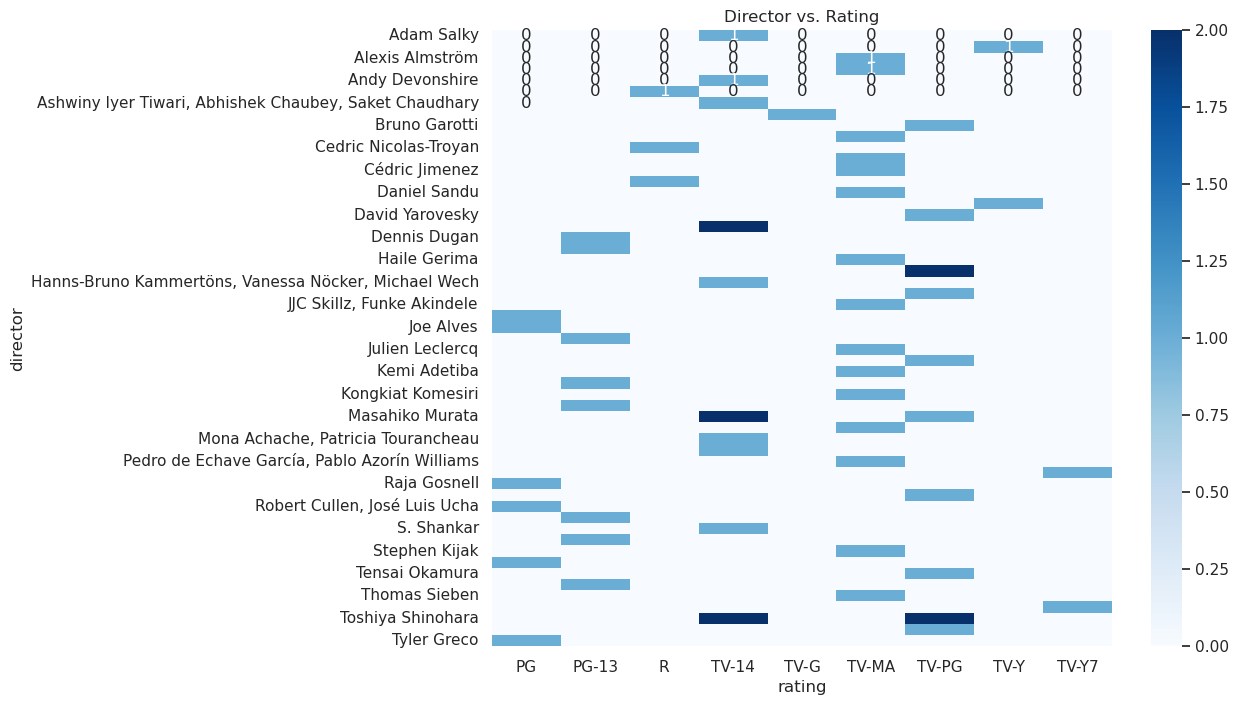

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(director_rating_crosstab, annot=True, cmap='Blues')
plt.title('Director vs. Rating')
plt.show()

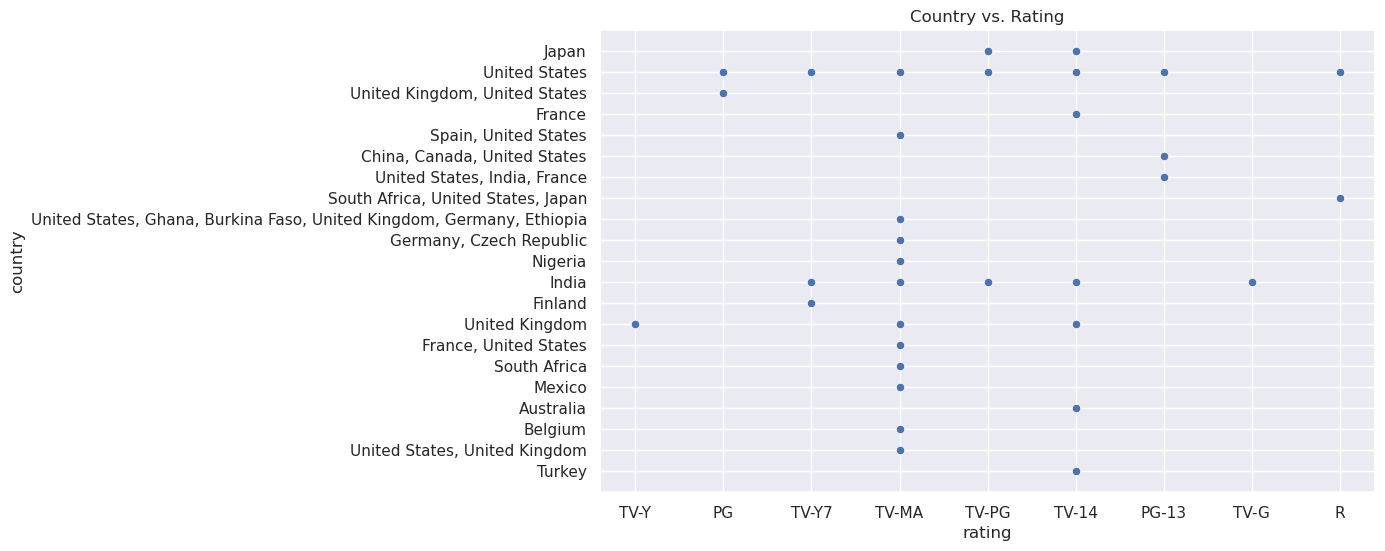

In [78]:
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x='rating', y='country', data=df)
plt.title('Country vs. Rating')
plt.show()

In [79]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [80]:
from flask import Flask, jsonify
app = Flask(__name__)

In [82]:
@app.route('/movies', methods=['GET'])
def get_movies():
    movies = Netflix_dataset.to_dict(orient='records')
    return jsonify(movies)

In [83]:
@app.route('/movies/<int:movie_id>', methods=['GET'])
def get_movie(movie_id):
    movie = Netflix_dataset.iloc[movie_id].to_dict()
    return jsonify(movie)

In [84]:
@app.route('/movies/type/<type>', methods=['GET'])
def get_movies_by_type(type):
    movies = Netflix_dataset[Netflix_dataset['type'] == type].to_dict(orient='records')
    return jsonify(movies)